In [1]:
import json
from pandas import json_normalize
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import seaborn as sns

In [2]:
# !pip install statsbombpy
# !pip install mplsoccer

pd.set_option('display.max_seq_items', None)

In [3]:
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, Sbopen
# from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams

In [4]:
wc19 =pd.read_pickle('wc19.pkl')
wc19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         43744 non-null  int64  
 1   pass_angle                     43744 non-null  float64
 2   pass_length                    43744 non-null  float64
 3   pass_recipient                 43744 non-null  object 
 4   possession_team                43744 non-null  object 
 5   possession_team_id             43744 non-null  int64  
 6   player                         43744 non-null  object 
 7   player_id                      43744 non-null  float64
 8   match_id                       43744 non-null  int64  
 9   pass_outcome_Complete          43744 non-null  uint8  
 10  pass_outcome_Incomplete        43744 non-null  uint8  
 11  pass_outcome_Injury Clearance  43744 non-null  uint8  
 12  pass_outcome_Out               43744 non-null 

In [5]:
euro22 =pd.read_pickle('euro22.pkl')
euro22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26002 entries, 0 to 26001
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         26002 non-null  int64  
 1   pass_angle                     26002 non-null  float64
 2   pass_length                    26002 non-null  float64
 3   pass_recipient                 26002 non-null  object 
 4   possession_team                26002 non-null  object 
 5   possession_team_id             26002 non-null  int64  
 6   player                         26002 non-null  object 
 7   player_id                      26002 non-null  float64
 8   match_id                       26002 non-null  int64  
 9   pass_outcome_Complete          26002 non-null  uint8  
 10  pass_outcome_Incomplete        26002 non-null  uint8  
 11  pass_outcome_Injury Clearance  26002 non-null  uint8  
 12  pass_outcome_Out               26002 non-null 

## Kmeans with PCA

In [6]:
columns_final = [#'player_id',
                 #'possession_team_id',
                 'period',
                 #'match_id',
                 #'pass_outcome_Complete',
                 'pass_angle',
                 'pass_length',
                 'start_x', 
                 'start_y', 
                 'end_x', 
                 'end_y',
                 'pass_height_Ground Pass', 
                 'pass_height_High Pass',
                 'pass_height_Low Pass']

# to add : period (to determine which half), 'match_id' to determine opponent

In [7]:
euro22.period = euro22.period.astype('float64')

In [8]:
# features to use
eupasses = euro22[(euro22['possession_team_id'] == 865) & 
                  #(euro22['period'] == 1) &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [9]:
eupasses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2693 entries, 0 to 26001
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period                   2693 non-null   float64
 1   pass_angle               2693 non-null   float64
 2   pass_length              2693 non-null   float64
 3   start_x                  2693 non-null   float64
 4   start_y                  2693 non-null   float64
 5   end_x                    2693 non-null   float64
 6   end_y                    2693 non-null   float64
 7   pass_height_Ground Pass  2693 non-null   uint8  
 8   pass_height_High Pass    2693 non-null   uint8  
 9   pass_height_Low Pass     2693 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 176.2 KB


In [112]:
X = np.array(eupasses)

In [113]:
# from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X))

In [114]:
ss = StandardScaler()
X = ss.fit_transform(reduced)

In [115]:
N_clusters = 20
# X = np.array(eupasses)

kmeans = KMeans(n_clusters = N_clusters)
kmeans.fit(reduced)
cluster_labels = kmeans.predict(reduced)


Text(0.5, 1.0, 'K-means')

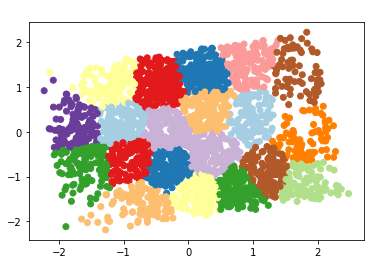

In [137]:
plt.scatter(X[:,0], X[:,1],c=cluster_labels, cmap='Paired')
plt.title("K-means", color ='w')

In [138]:
silhouette_score(reduced, cluster_labels)

0.3437389013913486

### DBScan

In [91]:
eupasses_db = euro22[(euro22['possession_team_id'] == 865) & 
                  #(euro22['period'] == 1) &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [92]:
eupasses_db

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
0,1.0,2.938882,25.828860,61.0,40.1,35.7,45.3,1,0,0
2,1.0,-3.068195,13.636715,92.1,7.3,78.5,6.3,0,0,1
3,1.0,2.119346,10.547511,76.6,6.0,71.1,15.0,1,0,0
4,1.0,-2.624105,14.958610,69.7,16.6,56.7,9.2,1,0,0
5,1.0,2.356194,38.042343,57.0,9.4,30.1,36.3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
25992,2.0,-0.244979,5.772348,15.2,32.9,20.8,31.5,1,0,0
25993,2.0,-0.530587,40.115460,20.8,31.5,55.4,11.2,1,0,0
25994,2.0,-0.252806,24.787900,56.2,10.6,80.2,4.4,1,0,0
26000,2.0,2.218430,24.200207,42.1,14.2,27.5,33.5,1,0,0


In [93]:
from sklearn.neighbors import NearestNeighbors

In [94]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(eupasses_db)
distances, indices = nbrs.kneighbors(eupasses_db)

In [118]:
distances, indices

(array([ 0.88414908,  0.88414908,  0.99016521, ..., 23.72477901,
        24.45003754, 24.65777457]),
 array([[   0, 2492],
        [   1, 1777],
        [   2, 1400],
        ...,
        [2690, 2501],
        [2691, 2608],
        [2692, 1816]], dtype=int64))

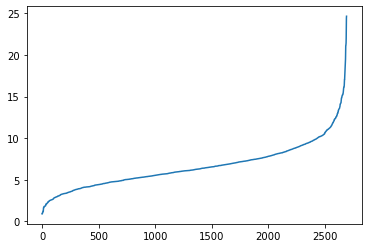

In [95]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [119]:
X_db = np.array(eupasses_db)

In [120]:
# from sklearn.decomposition import PCA
#pca = PCA(n_components = 2) # 2D PCA for the plot
#reduced_db = pd.DataFrame(pca.fit_transform(X_db))

In [133]:
ss = StandardScaler()
#X_scaled = ss.fit_transform(reduced_db)
X_scaled = ss.fit_transform(X_db)
dbscan = DBSCAN(eps=10, min_samples=10)
dbscan.fit(X_db)



DBSCAN(eps=10, min_samples=10)

Text(0.5, 1.0, 'DBScan')

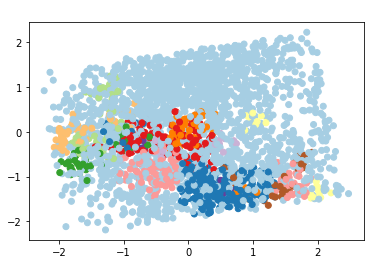

In [136]:
plt.scatter(X[:,0], X[:,1],c=dbscan.labels_, cmap='Paired')
plt.title("DBScan", color = 'w')

In [135]:
silhouette_score(reduced_db, dbscan.labels_)

-0.3986978242490947

In [63]:
eupasses_db['n_cluster'] = dbscan.labels_

In [64]:
eupasses_db['n_cluster'].unique()

array([ 0, -1], dtype=int64)

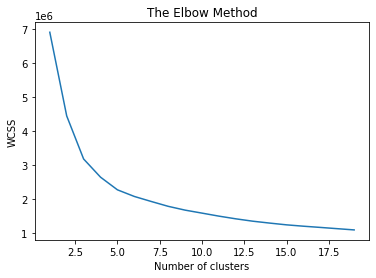

In [63]:
# assessed clusters based on elbow method, however 5 clusters does not provide much insights.
# through trial and error, selected 20 clusters.

X = np.array(eupasses)


wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()